In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import random
import pandas as pd
from matplotlib import gridspec
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from datetime import datetime
import time
import corner
import emcee
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy import odr
from ltsfit.lts_linefit import lts_linefit

In [14]:
Dist_i = pd.read_csv("MLratio_riz_distances_noCorrection.csv", sep=',')

for col in Dist_i.columns:
    newcol = col.strip()
    Dist_i.rename(columns={col:newcol}, inplace=True)
Dist_i = Dist_i.set_index("PGC")
Dist_i.rename(columns={"DMriz_fid":"DMi_fid"}, inplace=True)

Dist_i = Dist_i[["DM_75", "DMi_fid"]]

Dist_i.head()

,DM_75,DMi_fid
PGC,,
4,34.011709,33.421800
16,34.491034,34.618880
55,34.167913,33.807610
68,35.108989,34.812386
70,34.900087,35.316308


In [15]:
Dist_riz = pd.read_csv("MLratio_i_distances_noCorrection.csv", sep=',')

for col in Dist_riz.columns:
    newcol = col.strip()
    Dist_riz.rename(columns={col:newcol}, inplace=True)
Dist_riz = Dist_riz.set_index("PGC")

Dist_riz = Dist_riz[["DMriz_fid"]]

Dist_riz.head()

,DMriz_fid
PGC,
4,33.414343
16,34.649027
55,33.813740
68,34.871102
70,35.361160


In [16]:
df = Dist_i.join(Dist_riz)

df.head()

,DM_75,DMi_fid,DMriz_fid
PGC,,,
4,34.011709,33.421800,33.414343
16,34.491034,34.618880,34.649027
55,34.167913,33.807610,33.813740
68,35.108989,34.812386,34.871102
70,34.900087,35.316308,35.361160


In [18]:
DM_i = df["DMi_fid"].values
DM_riz = df["DMriz_fid"].values
DM_75 = df["DM_75"].values

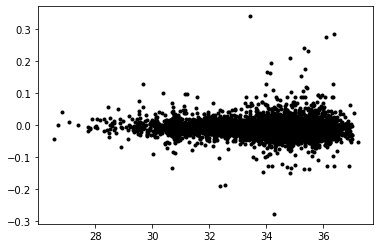

In [19]:
plt.plot(DM_75, DM_i-DM_riz, 'k.')

for i in np.arange(-1.0, 0, 0.05):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.05:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        
        xp = np.asarray(xp)
        yp = np.asarray(yp)
        
        Q1 = np.quantile(yp, 0.005)
        Q3 = np.quantile(yp, 0.995)
        
        xp = xp[((yp>Q1)&(yp<Q3))]
        yp = yp[((yp>Q1)&(yp<Q3))]
              
        if len(xp)>5:
            
            x  = np.median(xp)
            y  = np.median(yp)
            yerr = np.std(yp)
            
            ax.errorbar(x, y, yerr=yerr, fmt='o', 
                    color='red', ms=6, mfc='white') 